In [1]:
import pandas as pd

# Carga del dataset con las columnas seleccionadas
archivo = 'ensadul2021_l2.csv'
data = pd.read_csv(archivo, delimiter=';')

# mostrando los primeros renglones del dataset
data.head()


,Folio,Folio de integrante,Region o zona de trabajo,DESC_ENT,Edad del Seleccionado,ASEXO ¿Cuál es el sexo de (NOMBRE) ?,Durante la última semana...¿Sentía como si no pudiera quitarse de encima la tristeza?,Durante la última semana...¿se sintió deprimido/a?,Durante la última semana...¿no durmió bien?,A1405 ¿Tiene dificultad para caminar o subir escalones?,...,Region_Frontera,Region_Guanajuato,Region_Pacifico-Norte,Region_Pacífico Sur,Region_Pacífico-Centro,Region_Península,Region_Resto Centro Norte,"INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_aumentó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_disminuyó?","INT_H0905 En comparación al tiempo que pasaba sentado(a) o reclinado(a) de forma habitual antes de la pandemia por COVID-19, actualmente este tiempo…_fue igual?"
0,2021_01001019,2021_01001019_02,4,1,42,2,1.0,1.0,1.0,1,...,0,0,0,0,0,0,1,0,0,1
1,2021_01001019,2021_01001019_03,4,1,21,1,1.0,1.0,2.0,2,...,0,0,0,0,0,0,1,0,0,1
2,2021_01001021,2021_01001021_02,4,1,48,1,1.0,1.0,1.0,1,...,0,0,0,0,0,0,1,0,1,0
3,2021_01001031,2021_01001031_04,4,1,24,2,2.0,2.0,2.0,1,...,0,0,0,0,0,0,1,0,1,0
4,2021_01001105,2021_01001105_03,4,1,42,2,1.0,1.0,1.0,1,...,0,0,0,0,0,0,1,0,1,0


In [2]:
data.shape

(5745, 91)

In [3]:
#importando librerias necesarias para el modelo

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# quitando columnas identificadoras para que no alteren el resultado.
data_for_clustering = data.drop(['Folio', 'Folio de integrante'], axis=1)

data_for_clustering.shape

(5745, 89)

In [5]:
# Convirtiendo cualquier columna tipo objeto que pudiera haber en columnas enteras
for col in data_for_clustering.select_dtypes(include=['object']).columns:
    # los valores que no se pueden convertir los pasa a NaN
    data_for_clustering[col] = pd.to_numeric(data_for_clustering[col], errors='coerce')

# quitamos del dataset cuaquier na, NaN
data_for_clustering.dropna(inplace=True)

data_for_clustering.shape

(5745, 89)

In [6]:
# Normalizamos los datos para eliminar el efecto por diferentes escalas
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_clustering)


C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.

C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans

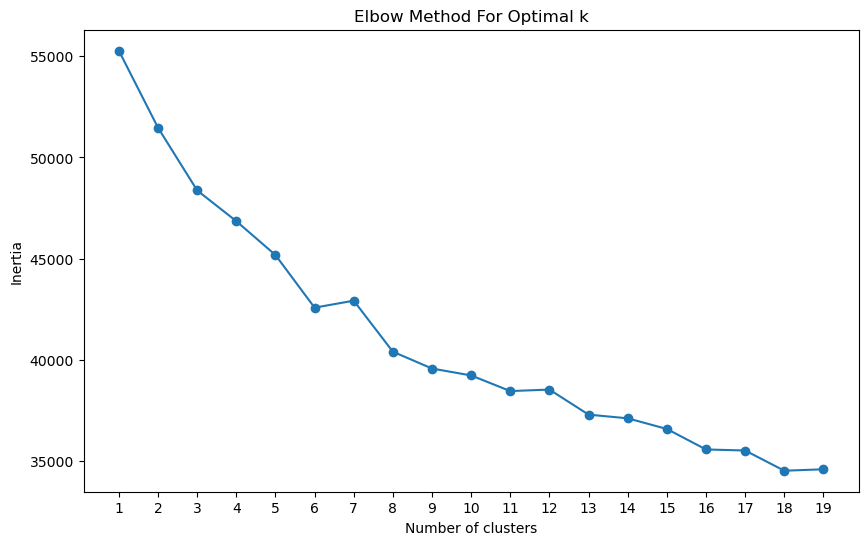

In [7]:

# realizamos un muestreo del 10% de los datos
sample_size = int(0.1 * len(normalized_data))
sampled_data = normalized_data[np.random.choice(normalized_data.shape[0], sample_size, replace=False)]

# Creamos la gráfica de codo o elbow para identificar el mejor cluster
inertia = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_data)
    inertia.append(kmeans.inertia_)

# mostrando gráica de elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.show()


In [8]:
# Calculando la tasa de cambio de la inercia para cada k (k-1 a k)
# Esto se hace tomando la diferencia en inercia entre cada k y el anterior,
# y luego dividir esa diferencia por la inercia en k-1 para obtener una tasa relativa de cambio.
rates_of_change = [((inertia[i-1] - inertia[i]) / inertia[i-1]) * 100 for i in range(1, len(inertia))]

rates_of_change

[6.883432506306115,
 6.018620222635141,
 3.13916776172396,
 3.573594998143347,
 5.755353929091692,
 -0.8097427058172306,
 5.87387492925468,
 2.05863003315142,
 0.8615854678794719,
 1.9698524893612572,
 -0.19294905982837848,
 3.2137841536810146,
 0.4864383694813164,
 1.4203869520365626,
 2.765489152316259,
 0.14574052091251424,
 2.8124702216378363,
 -0.2059381895111537]

C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans

C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marco Silva\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans

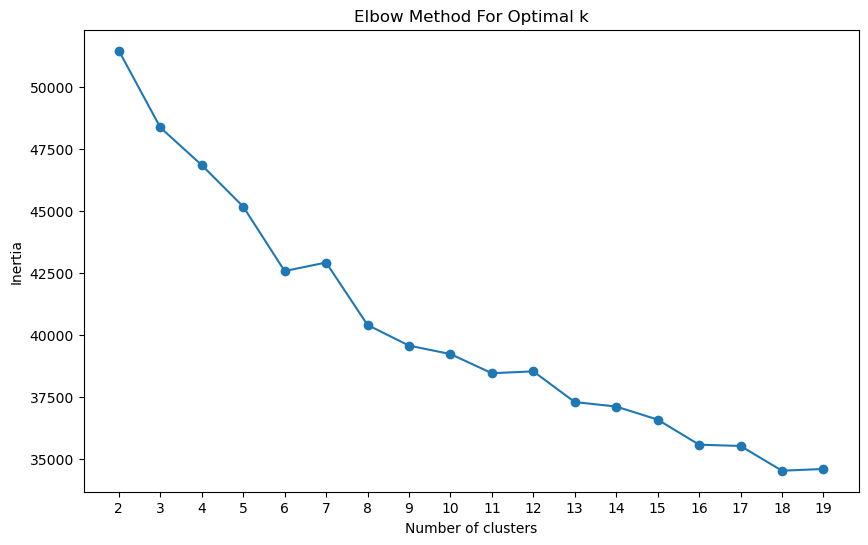

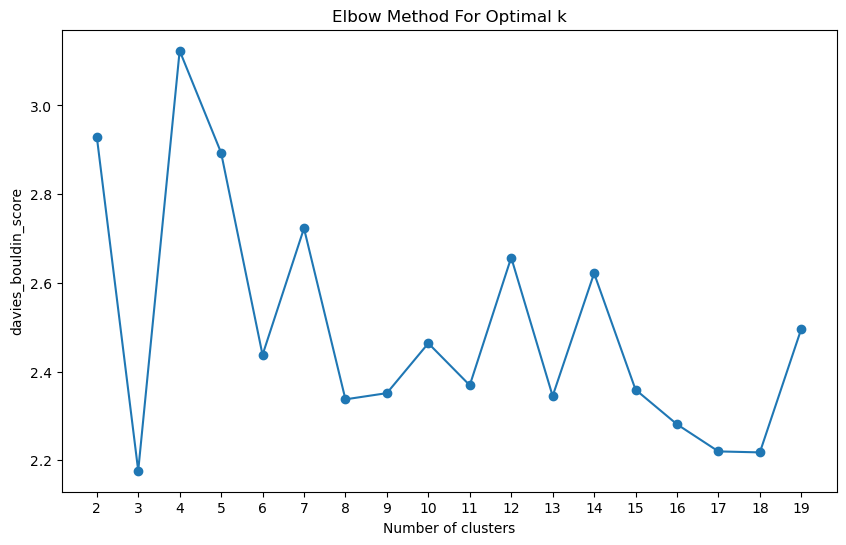

In [9]:
from sklearn.metrics import davies_bouldin_score

# Creamos la gráfica de codo o elbow para identificar el mejor cluster
inertia = []
DBindex = []

K_range = range(2, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sampled_data)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    davies_bouldin = davies_bouldin_score(sampled_data, labels)
    DBindex.append(davies_bouldin)

# mostrando gráfica de elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.show()

# Mostrando gráfica davies_boulding
plt.figure(figsize=(10, 6))
plt.plot(K_range, DBindex, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("davies_bouldin_score")
plt.xticks(K_range)
plt.show()


In [10]:
#Mostrando los indices davies_boulding
DBindex 

[2.9299344283798656,
 2.176562589617549,
 3.1234539135314945,
 2.893497964374388,
 2.4376549922047817,
 2.7230817263382527,
 2.337483568939055,
 2.3514905949378844,
 2.4639077298192045,
 2.369191900236069,
 2.657193874424859,
 2.3449483307563757,
 2.6216208144054365,
 2.359329655263329,
 2.281218242058479,
 2.2200953560790815,
 2.217898671643205,
 2.4965299486018]

In [11]:
inertia

[51466.0217911213,
 48368.47739581506,
 46850.109746568894,
 45175.87656804084,
 42575.84498098049,
 42920.59978015403,
 40399.49743018182,
 39567.82124284186,
 39226.91064505701,
 38454.19836921584,
 38528.39538343378,
 37290.17591793342,
 37108.78219422151,
 36581.69389387512,
 35570.03111750646,
 35518.191168867066,
 34519.25261897828,
 34590.340942854586]